In [7]:
import os
import numpy as np
import pandas as pd

eyes_results = '../micin/ynzw_result.csv.tsv'
read_dir = '../micin/brain/'
write_dir = '../data/brain/'
labels = ['N','MS','PD','PS']


def mkdir(dir_name):
    try:
        os.mkdir(dir_name)
    except:
        pass


# (pandas.DataFrame, ['N','AB']) -> pandas.DataFrame
def downsampling_data(data_frame, lables):
    df = data_frame
    sampling_size = min([ len(df[df['label'] == label ]) for label in labels ])
    sampling_idx = lambda label, sampling_size:\
        np.random.choice(df[ df.label == label ].index,
                         sampling_size, replace=False)
    sampling_data = lambda label, sampling_size:\
        pd.DataFrame(df.loc[sampling_idx(label, sampling_size)])
    data = pd.concat([ sampling_data(label, sampling_size) for label in  labels ],
                     ignore_index=True)
    return data


mkdir(write_dir)
mkdir(write_dir+'train/')
mkdir(write_dir+'validation/')
for label in labels:
    mkdir(write_dir+'train/'+label)
    mkdir(write_dir+'validation/'+label)



    

In [11]:
# 'PS116.jpg' -> ['PS', '116', '.jpg']
import itertools
strint_separator = lambda f:\
    [''.join(it) for _, it in itertools.groupby(f,str.isdigit)]

fname_label = []
flist = [ f for f in os.listdir(read_dir) if '.jpg' in f ] # for removing .DS_Store
for fname in flist:
    label = strint_separator(fname)[0] # 'N','MS','PD' or'PS'
    d = (fname, label)
    fname_label.append(d)
    
df = pd.DataFrame(fname_label,
                  columns=['fname','label'])
df = downsampling_data(df, labels)


In [15]:
df['label'][::20]

0       N
20      N
40      N
60     MS
80     MS
100    MS
120    PD
140    PD
160    PS
180    PS
200    PS
Name: label, dtype: object

In [ ]:

    fname = row[1][0] + '.JPG'
    label = 'N' if row[1][2]=='["異常なし"]' else 'AB'
    d = (fname, label)
    fname_label.append(d)
df = pd.DataFrame(fname_label,
      columns=['fname','label'])
df = downsampling_data(df, labels)

In [2]:
df = pd.read_csv(eyes_results,
                 delimiter='\t', header=None).dropna()
fname_label = []
for row in df.iterrows():
    fname = row[1][0] + '.JPG'
    label = 'N' if row[1][2]=='["異常なし"]' else 'AB'
    d = (fname, label)
    fname_label.append(d)
df = pd.DataFrame(fname_label,
      columns=['fname','label'])
df = downsampling_data(df, labels)

for label in labels:
    class_data = df[df.label == label]
    validation_data = class_data[:len(class_data)//10]
    train_data = class_data[len(class_data)//10:]
    for d in validation_data.iterrows():
        fname = d[1][0]
        read_fname = read_dir + fname
        write_fname = write_dir + 'validation/' + label + '/' + fname
        open(write_fname, 'wb').write(open(read_fname,'rb').read())
    for d in train_data.iterrows():
        fname = d[1][0]
        read_fname = read_dir + fname
        write_fname = write_dir + 'train/' + label + '/' + fname
        open(write_fname, 'wb').write(open(read_fname,'rb').read())

In [5]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)


train_generator = train_datagen.flow_from_directory(
    '../micin/brain/',
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical')


Found 0 images belonging to 0 classes.


In [8]:
dir(train_generator)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_flow_index',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'filenames',
 'image_data_generator',
 'image_shape',
 'index_generator',
 'lock',
 'n',
 'next',
 'num_class',
 'reset',
 'samples',
 'save_format',
 'save_prefix',
 'save_to_dir',
 'shuffle',
 'target_size',
 'total_batches_seen']

In [3]:
train_dataset

In [21]:
print(data[0][0].shape,data[0][1].shape)
print(data[1][0].shape,data[1][1].shape)
data[0][0]

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ..., 
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ..., 
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ..., 
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ..., 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ..., 
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ..., 
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ..., 
         [216, 184, 140],
  

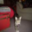

In [29]:
img = Image.fromarray(np.uint8(data[0][0][334]))
img

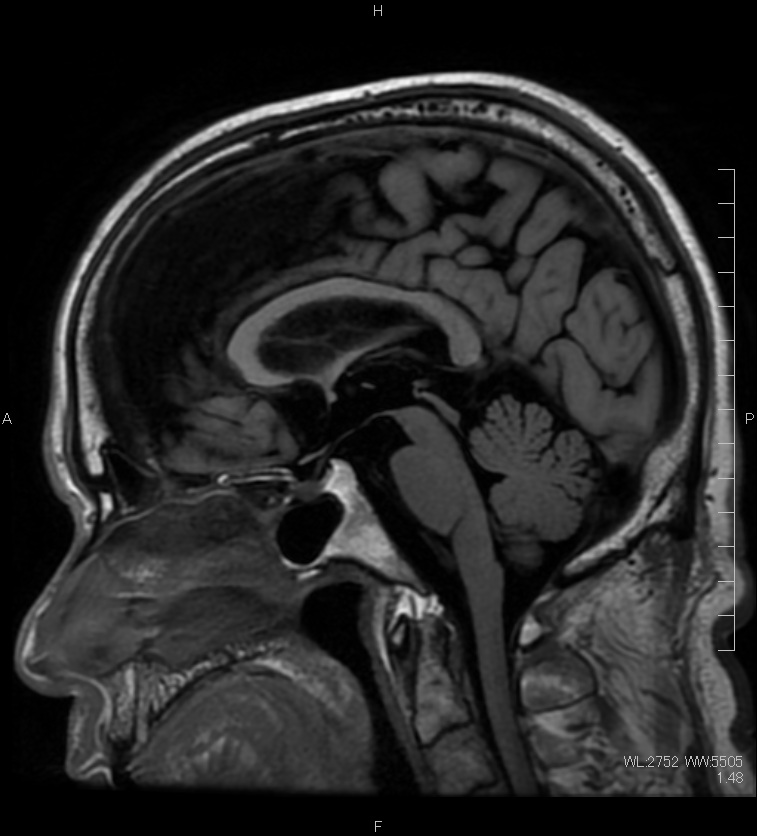

In [44]:
Image.fromarray(np.uint8(imgs[2]))

In [165]:
dir_name = '../micin/brain/'
modes = ['N','MS','PD','PS']
mode2id = {k:i for (i,k) in enumerate(modes)}
filename_separator = lambda f:\
    [''.join(it) for _, it in itertools.groupby(f,str.isdigit)]
labeler = lambda f: mode2id[filename_separator(f)[0]]
imgs = np.concatenate([ [ np.asarray(Image.open(dir_name+f).resize((256, 256), Image.LANCZOS))] for f in os.listdir(dir_name) if '.jpg' in f ])
labels = np.array([ [labeler(f)] for f in os.listdir(dir_name) if '.jpg' in f])
(x_test, y_test) = imgs[:len(imgs)//10],labels[:len(labels)//10]
(x_train, y_train) = imgs[len(imgs)//10:],labels[len(labels)//10:]

In [163]:
dir_name = '../micin/ynzw_result.csv.tsv/'
modes = ['N','AB']
mode2id = {k:i for (i,k) in enumerate(modes)}
filename_separator = lambda f:\
    [''.join(it) for _, it in itertools.groupby(f,str.isdigit)]
labeler = lambda f: mode2id[filename_separator(f)[0]]
imgs = np.concatenate([ [ np.asarray(Image.open(dir_name+f).resize((256, 256), Image.LANCZOS))] for f in os.listdir(dir_name) if '.jpg' in f ])
labels = np.array([ [labeler(f)] for f in os.listdir(dir_name) if '.jpg' in f])
(x_test, y_test) = imgs[:len(imgs)//10],labels[:len(labels)//10]
(x_train, y_train) = imgs[len(imgs)//10:],labels[len(labels)//10:]

In [167]:
x_test.shape

(26, 256, 256, 3)

In [194]:
import pandas as pd
df = pd.read_csv('../micin/ynzw_result.csv.tsv', delimiter='\t', header=None).dropna()

In [197]:
df[2][2]== '["異常なし"]'

True

In [ ]:
dir_name = '../micin/eyes/'
img2arr = lambda f: np.asarray(Image.open(f).resize((256, 256), Image.LANCZOS))
f = '../micin/eyes/'+df[0][2]+'.JPG'
print(f)
x_data = np.concatenate([[ img2arr(dir_name+f) ] for f in os.listdir(dir_name) if '.JPG' in f ])
x_data

modes = ['N','AB']
mode2id = {k:i for (i,k) in enumerate(modes)}
x_data = []
y_data = []
for row in df.iterrows():
    f = dir_name + row[1][0] + '.JPG'
    x_data.append(img2arr(f))
    label = 'N' if row[1][2]=='["異常なし"]' else 'AB'
    y_data.append(mode2id[label])


In [231]:
modes = ['N','AB']
mode2id = {k:i for (i,k) in enumerate(modes)}
x_data = []
y_data = []
for row in df.iterrows():
    f = dir_name + row[1][0] + '.JPG'
    x_data.append(img2arr(f))
    label = 'N' if row[1][2]=='["異常なし"]' else 'AB'
    y_data.append(mode2id[label])

In [240]:
a = time.time()

In [258]:
dir_name = '../micin/eyes/'
modes = ['N','AB']
mode2id = {k:i for (i,k) in enumerate(modes)}
x_data = []
y_data = []
df = pd.read_csv('../micin/ynzw_result.csv.tsv', delimiter='\t', header=None).dropna()
i = 0
for row in df.iterrows():
    i+=1
    if i>10:
        break
    f = dir_name + row[1][0] + '.JPG'
    x_data.append([img2arr(f)])
x_data = np.concatenate(x_data)


In [260]:
t1  = time.time()

In [322]:
modes= [0,1]

n = min([ len(y_data[y_data==m ]) for m in mode ])
y_data[y_data==0][:n]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [300]:
y_data.shape

(2447, 1)

In [284]:
(i) = y_data.nonzero()
y_data[i].shape

(285,)

In [310]:
y_data = []
for row in df.iterrows():
    #f = dir_name + row[1][0] + '.JPG'
    label = 'N' if row[1][2]=='["異常なし"]' else 'AB'
    y_data.append([mode2id[label]])
y_data = np.array(y_data)

In [278]:
y_data ==1

array([ True, False, False, ...,  True, False, False], dtype=bool)